In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset description

Source https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download


|Attribute|Description|
|:-------|:-------|
|track_id | The Spotify ID for the track|
|artists | The artists' names who performed the track. If there is more than one artist, they are separated by a ;|
|album_name | The album name in which the track appears|
|track_name | Name of the track|
|popularity | The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.|
|duration_ms | The track length in milliseconds|
|explicit | Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)|
|danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable|
|energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale|
|key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1|
|loudness | The overall loudness of a track in decibels (dB)|
|mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0|
|speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks|
|acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic|
|instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content|
|liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live|
|valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)|
|tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration|
|time_signature | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.|
|track_genre | The genre in which the track belongs|



## Data loading

In [2]:
df = pd.read_csv('dataset.csv')
df = df.iloc[:, 1:21]
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
display(df.isna().sum().sort_values(ascending=False))
len(df.index)

album_name          1
track_name          1
artists             1
track_id            0
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

114000

In [4]:
df = df.dropna()
display(df.isna().sum().sort_values(ascending=False))
len(df.index)

track_id            0
artists             0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_name          0
album_name          0
track_genre         0
dtype: int64

113999

# NOTE
The amount of records is quite a lot and clustering took too long to compute, so I decided to sample to 1/4 of the original record size, hoping for the same results

In [5]:
df = df.sample(frac=0.15, random_state=15, ignore_index=True)

In [6]:

df['mode'] = df.apply(lambda r: 'major' if int(r['mode']) == 1 else 'minor', axis=1)
df['time_signature'] = df.apply(lambda r: f'{r.time_signature}/4', axis=1)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,1uUf8MUvBnhC8TudDxV2hj,Impaled Nazarene,Absence Of War Does Not Mean Peace,Nyrkilla Tapettava Huora,19,180893,False,0.284,0.974,2,-4.142,major,0.0997,0.000002,0.183000,0.3230,0.121,114.783,4/4,black-metal
1,1FdbP9ZAcqQnOcda55boaL,Guri,Billian Billian,Billian Billian,59,177600,False,0.708,0.893,8,-2.002,minor,0.0549,0.018800,0.000055,0.4710,0.753,100.031,4/4,hip-hop
2,7DdvDxrc8iYum3tIdS7Lim,Cegıd,Delüzyon,Herşeyin Bir Bedeli Var,43,228532,True,0.764,0.648,5,-7.178,major,0.2710,0.372000,0.000000,0.0911,0.353,121.968,4/4,turkish
3,5JZGFSGzpRkEksBPu8n1kY,Yuvan Shankar Raja;G. V. Prakash;D. Imman;Vija...,Biriyani (Original Motion Picture Soundtrack),Edhirthu Nill,56,261346,False,0.795,0.755,6,-6.031,minor,0.0441,0.281000,0.000001,0.0470,0.606,123.962,4/4,pop-film
4,64gE7q6PCfNuHp64GIR5Rf,Los Pericos,Big Yuyo,Jamaica Blood,34,198826,False,0.685,0.577,9,-14.078,minor,0.0568,0.001140,0.370000,0.0438,0.876,150.226,4/4,ska


In [7]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,17100.000000,1.710000e+04,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000
mean,33.354386,2.270651e+05,0.567744,0.645862,5.327778,-8.186131,0.086504,0.310888,0.152485,0.217140,0.476906,122.372548
std,22.318026,9.287556e+04,0.172688,0.250273,3.555100,4.958264,0.108819,0.331385,0.306800,0.192886,0.258362,29.895464
min,0.000000,1.580000e+04,0.000000,0.000020,0.000000,-43.303000,0.000000,0.000000,0.000000,0.013700,0.000000,0.000000
25%,17.000000,1.745052e+05,0.457000,0.478000,2.000000,-9.906750,0.036000,0.015900,0.000000,0.098600,0.263000,99.838250
50%,35.000000,2.131750e+05,0.580000,0.691000,5.000000,-6.975500,0.049100,0.162000,0.000041,0.134000,0.468000,122.057500
75%,50.000000,2.609132e+05,0.694000,0.856000,8.000000,-4.949750,0.087100,0.591000,0.041025,0.281000,0.686000,140.125250
max,98.000000,1.817447e+06,0.985000,1.000000,11.000000,0.910000,0.963000,0.996000,0.999000,1.000000,0.995000,218.879000


In [8]:
def plot_nums(l_df):
    nrows, ncols = l_df.shape
    fig, axes = plt.subplots(nrows=ncols, ncols=1, figsize=(10, 40))
    for i, column in enumerate(l_df):
        sns.histplot(data=l_df, x=column, ax=axes[i]).set_title(column)
    fig.tight_layout()

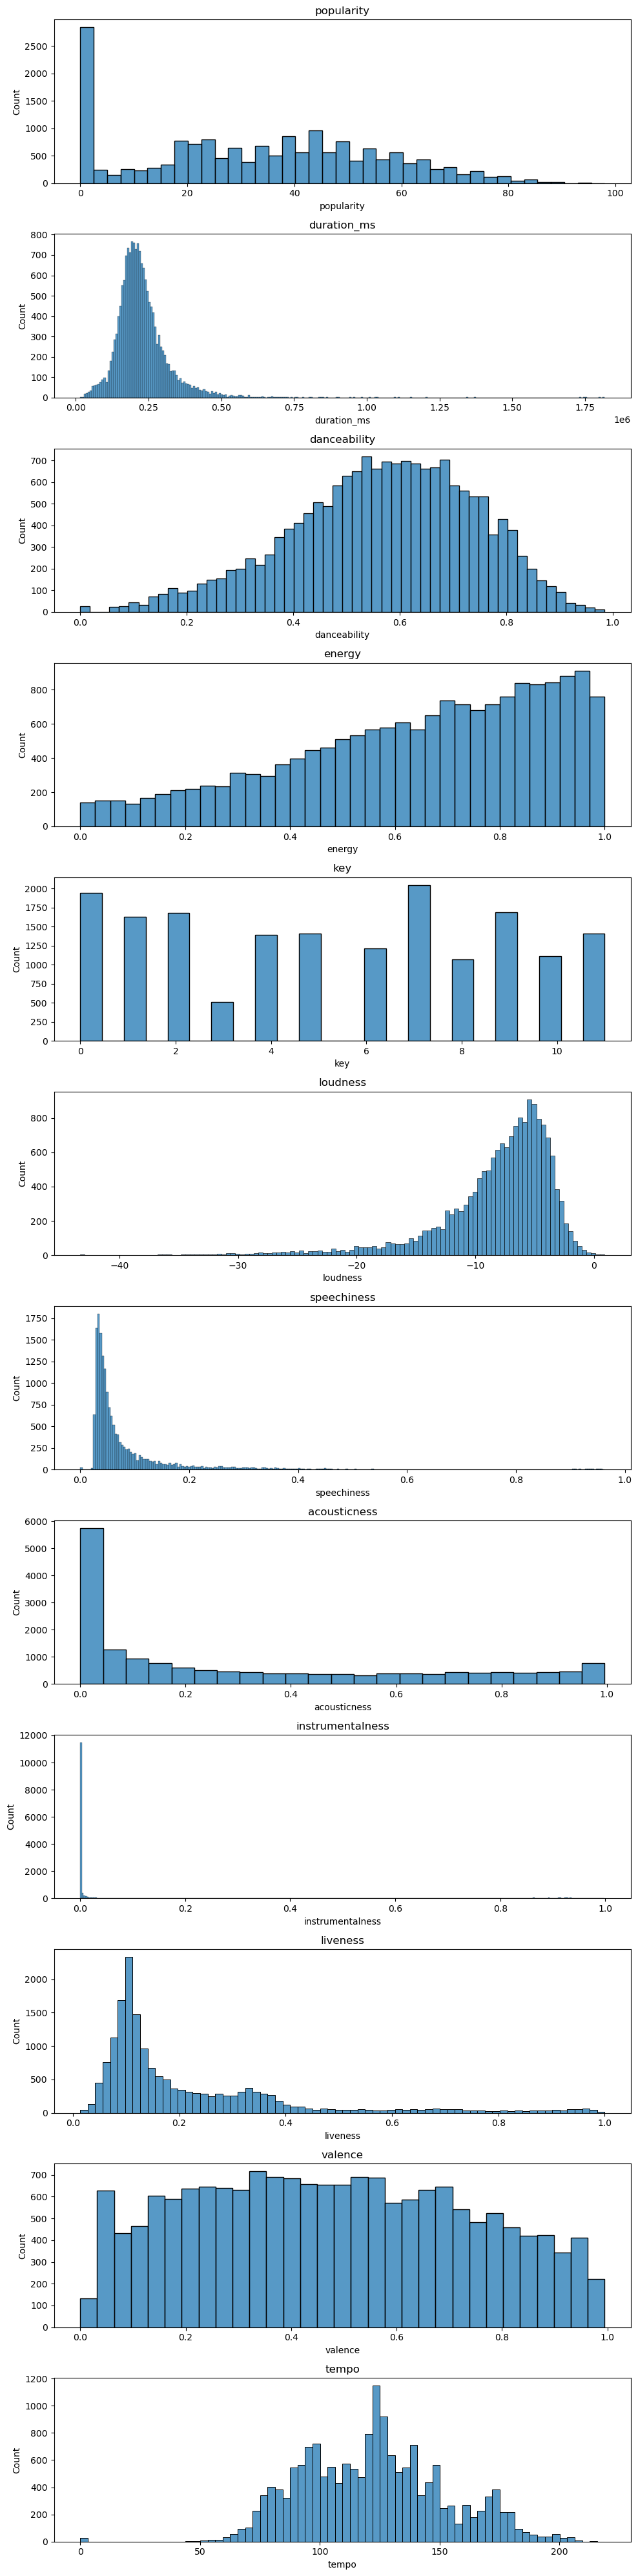

In [10]:
df_only_numeric = df.select_dtypes(np.number)
plot_nums(df_only_numeric)

## Clustering #1

From the previous plots we can see that some columns have exponential distribution, except for valence and tempo, which seem to have more or less normal distribution.
First, lets try to apply power scaler to the whole dataset of numerical values.

In [11]:
X = df_only_numeric.copy()
scaler = sklearn.preprocessing.PowerTransformer()
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

X.head(5)
X_power_scaled = X

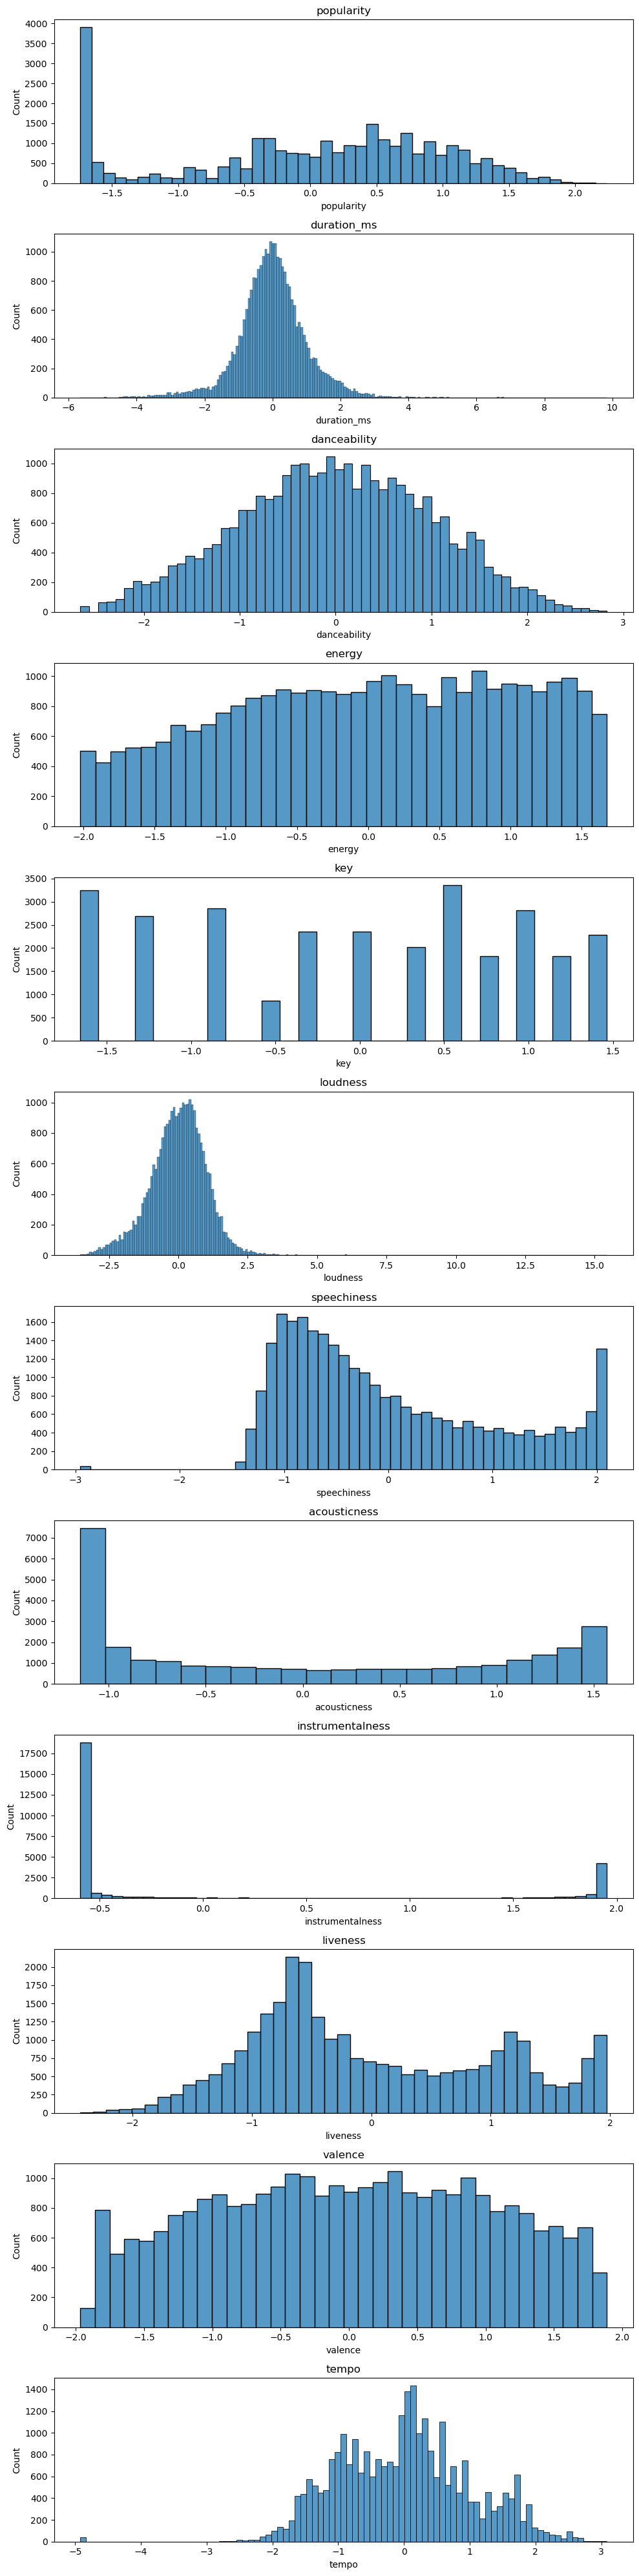

In [12]:
plot_nums(X)

In [13]:
X_power_scaled = X

In [13]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X_power_scaled)
    print(k)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_power_scaled, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores

2
3
4
5
6
7
8
9
10


,k,sse,silhouette
0,2,288125.297861,0.154445
1,3,263707.740334,0.119010
2,4,248703.344043,0.114593
3,5,234752.010267,0.115352
4,6,224113.557980,0.111860
5,7,215057.246709,0.111869
6,8,208801.597444,0.106367
7,9,203565.379353,0.099227
8,10,198856.331211,0.101075


<AxesSubplot: xlabel='k', ylabel='sse'>

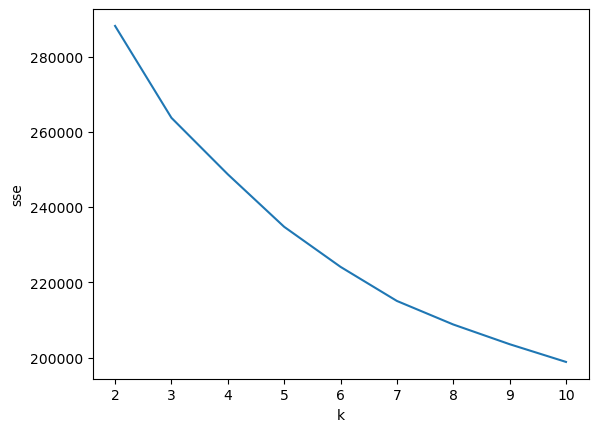

In [14]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

<AxesSubplot: xlabel='k', ylabel='silhouette'>

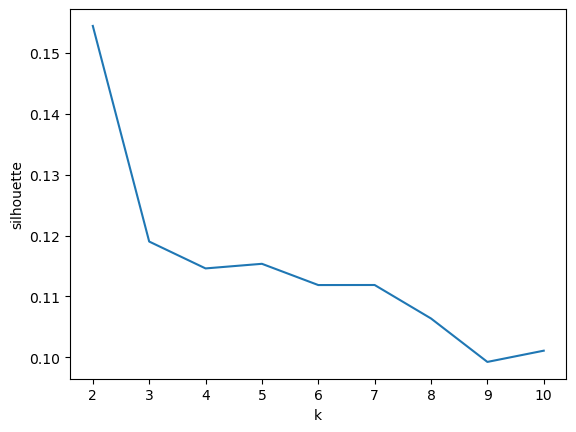

In [15]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

Since there is a minor bump in **k=4**, lets pick K = 4 as a good number of clusters

In [16]:
k = 4
clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X_power_scaled)
df['cluster_id'] = clustering.labels_

<AxesSubplot: xlabel='cluster_id', ylabel='count'>

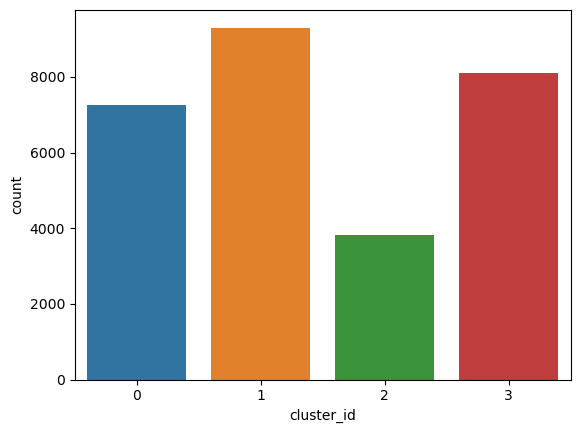

In [17]:
sns.countplot(data=df, x='cluster_id')

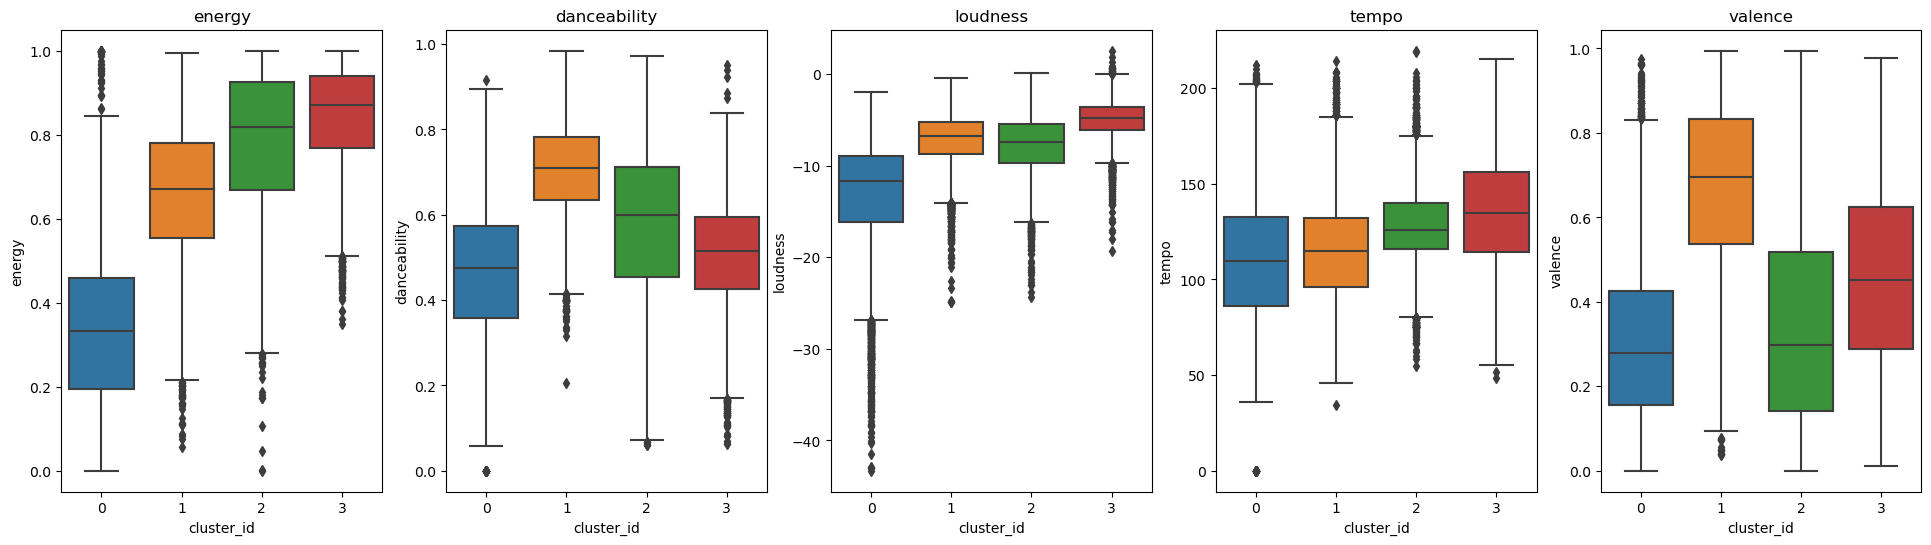

In [18]:
cols = ['energy', 'danceability', 'loudness', 'tempo', 'valence']
fig, axes= plt.subplots(1, len(cols), figsize=(24, 6))
for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, x='cluster_id', ax=axes[i]).set_title(col)


In [19]:
eval_cols = ['track_genre'] #, 'mode', 'key']
for i in range(k):
    for col in eval_cols:
        df_agg = df[df.cluster_id == i].groupby(col).track_id.count().reset_index(name='cnt')
        df_agg = df_agg.sort_values(by='cnt', ascending=False)
        display('Cluster ', i, df_agg.head(10))

'Cluster '

0

,track_genre,cnt
15,classical,237
72,new-age,235
4,ambient,221
73,opera,217
96,sleep,206
88,romance,188
75,piano,180
94,singer-songwriter,178
25,disney,177
61,jazz,175


'Cluster '

1

,track_genre,cnt
90,salsa,220
62,kids,217
83,reggae,208
64,latino,207
84,reggaeton,203
20,dancehall,199
63,latin,198
13,children,191
48,hip-hop,189
35,funk,185


'Cluster '

2

,track_genre,cnt
22,detroit-techno,244
69,minimal-techno,237
12,chicago-house,188
100,trance,171
6,black-metal,169
99,techno,161
10,breakbeat,158
24,drum-and-bass,136
38,grindcore,130
50,idm,121


'Cluster '

3

,track_genre,cnt
72,metalcore,228
50,heavy-metal,203
49,hardstyle,182
44,grunge,180
61,j-idol,178
86,punk-rock,176
78,party,173
85,punk,173
71,metal,164
48,hardcore,162


## Results after 1 clustering

The results after clustering seems to be pretty good. The clusters contains the most track genres, that are subjectively similiar in both being "energetic" and "danceable" to or contain similiar musical instruments.
For example, cluster 0 is made of genres that use acoustic instruments like a guitar or piano heavily. Cluster 2 contains electronic genres, cluster 3 mostly electric guitars and cluster 1 is somewhat between all of the others.

The only suspicious thing is *hip-hop* genre in cluster 1 in between kids, children a funky music.


## Clustering Attempt #2 - using DBSCAN


In [20]:
dist_matrix = scipy.spatial.distance_matrix(X_power_scaled, X_power_scaled)
dist_matrix

array([[0.        , 4.82107523, 5.05329049, ..., 4.51776883, 6.35598394,
        4.08497728],
       [4.82107523, 0.        , 4.72857084, ..., 2.61680816, 7.98065352,
        2.63225039],
       [5.05329049, 4.72857084, 0.        , ..., 5.04344303, 5.30311517,
        4.52933742],
       ...,
       [4.51776883, 2.61680816, 5.04344303, ..., 0.        , 6.91849741,
        2.61860937],
       [6.35598394, 7.98065352, 5.30311517, ..., 6.91849741, 0.        ,
        6.65688907],
       [4.08497728, 2.63225039, 4.52933742, ..., 2.61860937, 6.65688907,
        0.        ]])

In [21]:
# sns.histplot(dist_matrix.flatten())

In [22]:
dist_matrix.sort(axis=1)

In [23]:
dist_matrix.shape

(28500, 28500)

<AxesSubplot: ylabel='Count'>

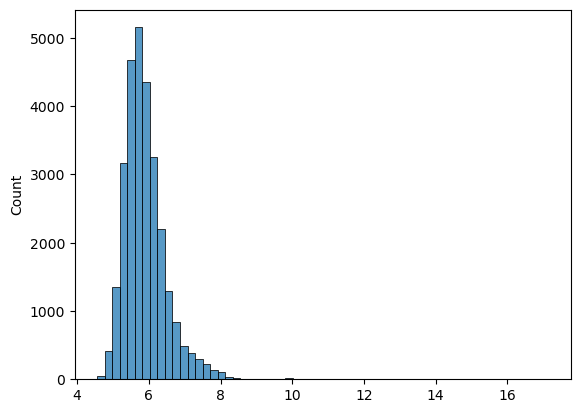

In [24]:
sns.histplot(dist_matrix[:, 25000], bins=60)

In [14]:
clustering = sklearn.cluster.DBSCAN(eps=3, min_samples=5)
clustering.fit(X_power_scaled)

DBSCAN(eps=3)

In [15]:
pd.Series(clustering.labels_).value_counts()

 0    28444
 1       34
-1       22
dtype: int64

In [16]:
df['cluster_id'] = clustering.labels_

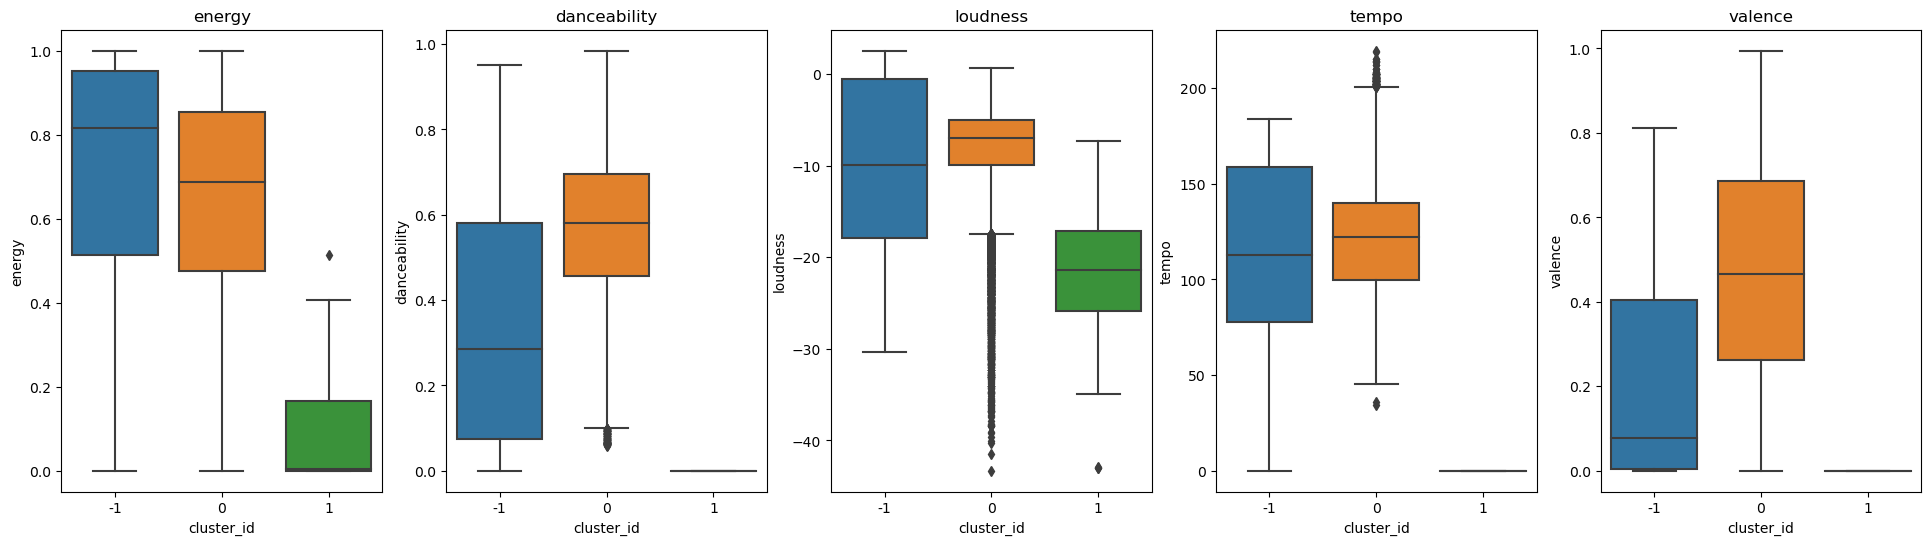

In [17]:
cols = ['energy', 'danceability', 'loudness', 'tempo', 'valence']
fig, axes= plt.subplots(1, len(cols), figsize=(24, 6))
for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, x='cluster_id', ax=axes[i]).set_title(col)


### Results DBSCAN

DBSCAN clustering yielded no satisfying results, after trying many epsilon distances. Either way too many records were treated as noise or just a single big cluster, with many tiny clusters.

## Clustering attempt #3

Clustering using only danceability, liveness, valence, tempo

In [11]:
minmax = sklearn.preprocessing.MinMaxScaler()
power = sklearn.preprocessing.PowerTransformer()

In [33]:
X = df_only_numeric.copy()

In [34]:
minmaxcols = ['valence', 'tempo']
powercols = ['danceability', 'liveness', 'energy']


for col in minmaxcols:
    X[col] = minmax.fit_transform(X[[col]])

for col in powercols:
    X[col] = power.fit_transform(X[[col]])
    
X_scaled = X.drop(labels=[l for l in X.columns if l not in minmaxcols and l not in powercols], axis=1)


In [35]:
X_scaled.head(5)

,danceability,energy,liveness,valence,tempo
0,-1.558705,1.518807,1.098286,0.121608,0.524413
1,0.806312,1.057196,1.537195,0.756784,0.457015
2,1.185026,-0.133977,-0.867973,0.354774,0.557239
3,1.401542,0.349571,-1.657856,0.609045,0.566349
4,0.655367,-0.424978,-1.724340,0.880402,0.686343


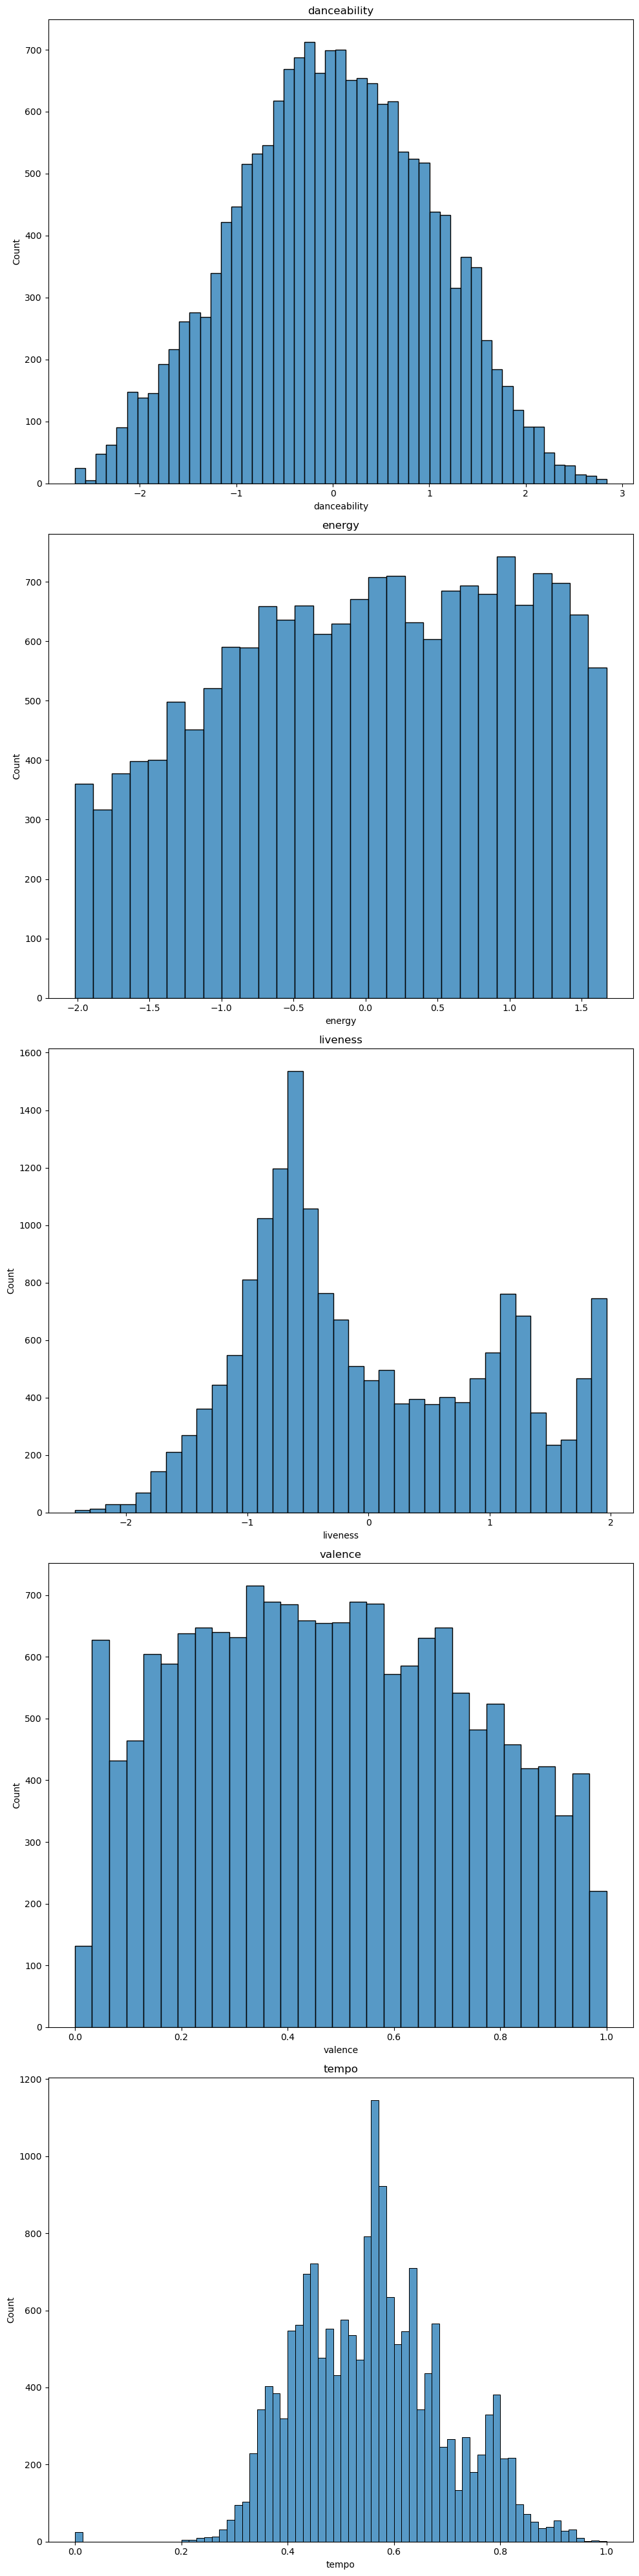

In [36]:
plot_nums(X_scaled)

In [17]:
clustering_scores = []
for k in range(2, 8):
    clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X_scaled)
    print(k)
    clustering_scores.append({
        'k': k,
        'silhouette': sklearn.metrics.silhouette_score(X_scaled, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores

2
3
4
5
6
7


,k,silhouette
0,2,0.251655
1,3,0.269224
2,4,0.273253
3,5,0.262672
4,6,0.265128
5,7,0.231389


<AxesSubplot: xlabel='k', ylabel='silhouette'>

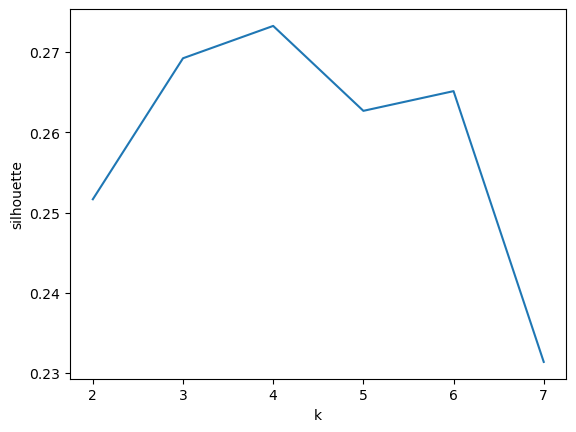

In [18]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

In [37]:
k = 4
clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X_scaled)

In [38]:
df['cluster_id'] = clustering.labels_

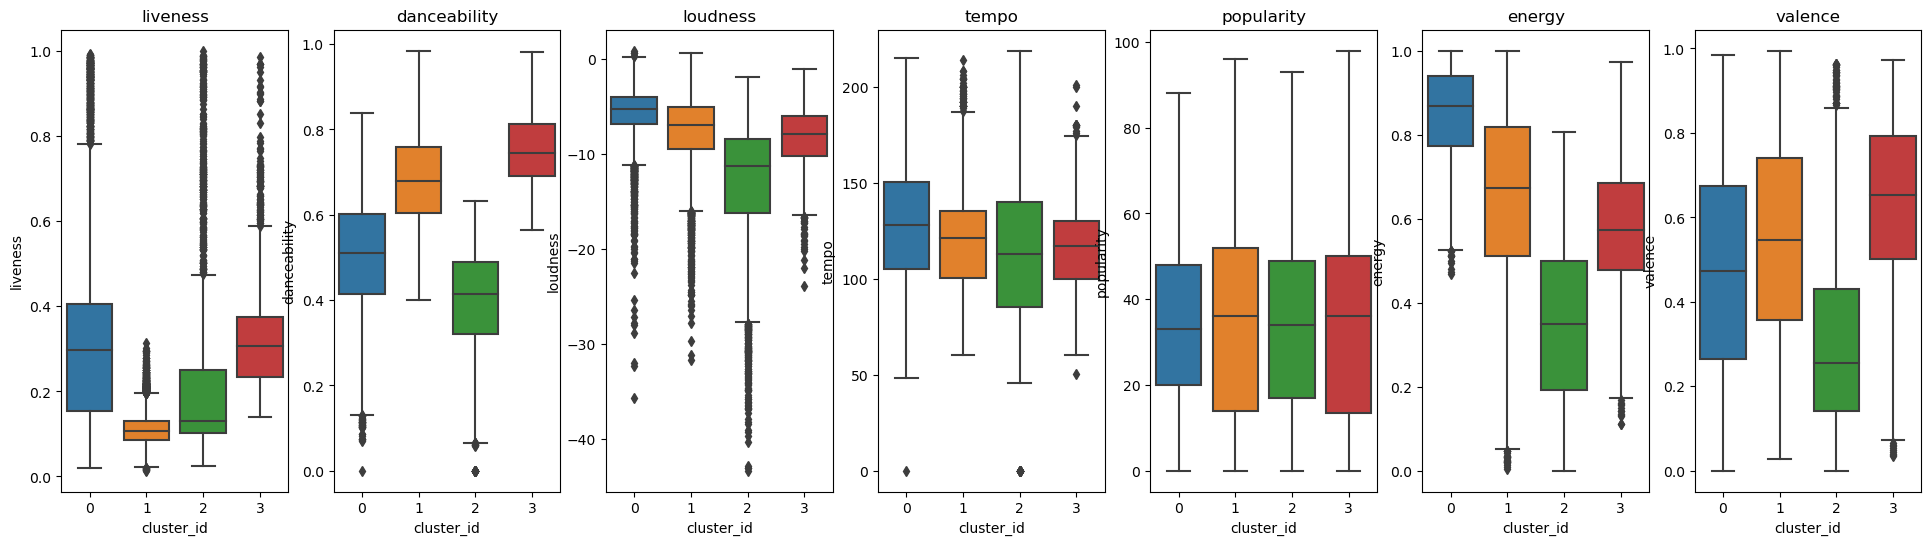

In [44]:
# minmaxcols = ['valence', 'tempo']
# powercols = ['danceability', 'liveness', 'energy']

cols = ['liveness', 'danceability', 'loudness', 'tempo', 'popularity', 'energy', 'valence']
fig, axes= plt.subplots(1, len(cols), figsize=(24, 6))
for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, x='cluster_id', ax=axes[i]).set_title(col)


In [43]:
eval_cols = ['track_genre', 'popularity'] # , 'key']
for i in range(k):
    for col in eval_cols:
        df_agg = df[df.cluster_id == i].groupby(col).track_id.count().reset_index(name='cnt')
        df_agg = df_agg.sort_values(by='cnt', ascending=False)
        display('Cluster ', i, 'col ', col, df_agg.head(10))

'Cluster '

0

'col '

'track_genre'

,track_genre,cnt
6,black-metal,140
72,metalcore,129
22,death-metal,125
42,grindcore,123
18,comedy,118
27,drum-and-bass,113
46,happy,110
50,heavy-metal,109
58,industrial,103
82,power-pop,102


'Cluster '

0

'col '

'popularity'

,popularity,cnt
0,0,639
23,23,148
22,22,147
21,21,137
20,20,125
24,24,116
38,38,115
26,26,109
41,41,105
35,35,105


'Cluster '

1

'col '

'track_genre'

,track_genre,cnt
73,minimal-techno,129
24,detroit-techno,126
13,chicago-house,125
68,latino,114
89,reggaeton,112
95,salsa,110
23,deep-house,109
104,study,106
88,reggae,105
21,dancehall,105


'Cluster '

1

'col '

'popularity'

,popularity,cnt
0,0,1012
1,1,149
44,44,145
43,43,138
46,46,134
45,45,129
41,41,125
21,21,123
47,47,119
40,40,116


'Cluster '

2

'col '

'track_genre'

,track_genre,cnt
73,new-age,131
15,classical,131
74,opera,129
4,ambient,124
77,piano,105
90,romance,99
95,show-tunes,98
97,sleep,96
62,jazz,92
109,world-music,84


'Cluster '

2

'col '

'popularity'

,popularity,cnt
0,0,578
21,21,99
22,22,97
20,20,92
44,44,86
24,24,73
23,23,68
43,43,67
39,39,66
42,42,64


'Cluster '

3

'col '

'track_genre'

,track_genre,cnt
58,kids,37
12,children,36
84,sad,30
78,reggae,23
44,hip-hop,23
86,samba,22
79,reggaeton,22
60,latino,19
92,soul,19
19,dancehall,18


'Cluster '

3

'col '

'popularity'

,popularity,cnt
0,0,152
44,44,24
39,39,22
48,48,21
37,37,20
40,40,19
20,20,18
41,41,17
46,46,17
17,17,16


## Results 3

Althogh in boxplots these clusters can have some similiarity between them, by using genres, there is a lot of inconsistencies. Techno and study genre in cluster 1 or comedy genre in cluster 0 together with metal music. 